In [123]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [124]:
train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")

In [125]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
train.shape

(42000, 785)

In [127]:
test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

In [128]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
test.shape
num_pixels = test.shape[1]

In [130]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense
from keras.optimizers import Adam
import random

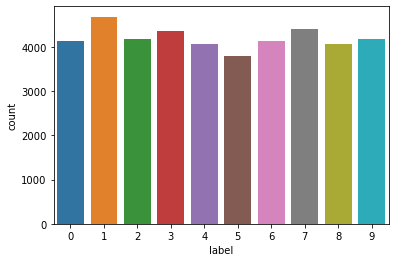

In [131]:
sns.countplot(train['label'])

In [132]:
x_train = train.drop(['label'],axis = 1)
x_test = test
x_train
        
  

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [133]:
np.array(x_train)
print(x_train.shape)
print(x_test.shape)
#already flattened

(42000, 784)
(28000, 784)


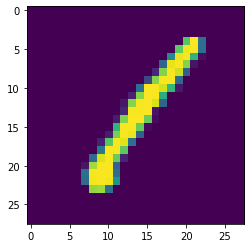

In [134]:
# lets visualize the 1st image
temp = np.array(x_train) # transformin datafraem to np array
temp = temp[0]   # taking the 1st image
temp = temp.reshape(28,28)   # reshaping the flattened image to 28*28 pixels
temp
plt.imshow(temp)

In [135]:
# normalize inputs from 0-255 to 0-1
x_train = x_train / 255
x_test = x_test / 255
type(x_train)

pandas.core.frame.DataFrame

In [136]:
y_train = train['label']
y_train = np.array(y_train)
y_train

array([1, 0, 1, ..., 7, 6, 9])

In [137]:
x_train = np.array(x_train)
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [138]:
from keras.utils import to_categorical
y_train  = to_categorical(y_train)
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [139]:
print(y_train.shape)

(42000, 10)


In [140]:
num_classes = y_train.shape[1]
num_classes

10

#  Build a Conventional Neural Network

In [141]:
def classification_model():
    model = Sequential()
    model.add(Dense(num_pixels, activation='relu', input_shape=(num_pixels,)))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
    

In [142]:
model = classification_model()

# fit the model
model.fit(x_train, y_train, epochs=3, verbose=2)

Epoch 1/10
1313/1313 - 5s - loss: 0.2078 - accuracy: 0.9371
Epoch 2/10
1313/1313 - 5s - loss: 0.0880 - accuracy: 0.9735
Epoch 3/10
1313/1313 - 6s - loss: 0.0599 - accuracy: 0.9808
Epoch 4/10
1313/1313 - 6s - loss: 0.0417 - accuracy: 0.9859
Epoch 5/10
1313/1313 - 6s - loss: 0.0337 - accuracy: 0.9891
Epoch 6/10
1313/1313 - 6s - loss: 0.0251 - accuracy: 0.9916
Epoch 7/10
1313/1313 - 5s - loss: 0.0240 - accuracy: 0.9919
Epoch 8/10
1313/1313 - 5s - loss: 0.0204 - accuracy: 0.9934
Epoch 9/10
1313/1313 - 5s - loss: 0.0181 - accuracy: 0.9940
Epoch 10/10
1313/1313 - 6s - loss: 0.0204 - accuracy: 0.9939


In [143]:
y_test = model.predict(x_test)
y_test

array([[7.33823106e-18, 5.19592306e-20, 1.00000000e+00, ...,
        3.32445920e-12, 2.63661129e-14, 1.28588498e-20],
       [1.00000000e+00, 2.46946235e-13, 6.65967489e-11, ...,
        2.23076158e-12, 3.17878188e-15, 1.93705403e-13],
       [3.91105232e-10, 2.29142483e-08, 1.98811412e-09, ...,
        1.87879084e-06, 1.43730722e-05, 9.99847412e-01],
       ...,
       [6.76246901e-31, 7.69793180e-21, 4.54576217e-21, ...,
        1.01338104e-19, 1.53811728e-19, 4.52496266e-15],
       [2.34858444e-09, 6.07951867e-09, 5.12258413e-09, ...,
        2.07155477e-04, 1.14404775e-09, 9.95307863e-01],
       [1.58953547e-19, 1.19395839e-20, 1.00000000e+00, ...,
        3.98129499e-15, 1.69911269e-14, 7.27906531e-19]], dtype=float32)

In [144]:
y_pred = np.argmax(y_test, axis=1)

In [145]:
y_pred

array([2, 0, 9, ..., 3, 9, 2])

In [146]:
sample_sub = pd.read_csv("/kaggle/input/digit-recognizer/sample_submission.csv")
sample_sub

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
27995,27996,0
27996,27997,0
27997,27998,0
27998,27999,0


In [147]:
y_pred.shape

(28000,)

In [148]:
submission = pd.DataFrame({'ImageId':range(1,y_pred.shape[0]+1),'Label':y_pred})
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [149]:
import os
os.chdir(r'../working')
submission.to_csv(r'submission.csv',index = False)
from IPython.display import FileLink
FileLink(r'submission.csv')

/kaggle/working/submission.csv

# Basic CNN Model

In [150]:
from keras import layers

In [174]:
print(x_train)
print(y_train)
print(x_train.shape)
print(y_train.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
(42000, 784)
(42000, 10)


In [176]:
print(x_test.shape)

(28000, 784)


In [181]:
x_test = np.array(x_test)
x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [182]:
X_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
X_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [186]:
Y_train  = y_train

In [191]:
print(X_train)
print(Y_train)

[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.

In [192]:
keras.backend.clear_session()
def CNN_classification():
    model = Sequential()
    # add the first convolution layer
    model.add(layers.Convolution2D(filters = 16, kernel_size = (3,3), activation = 'relu', input_shape = (28, 28, 1)))
    # add the first pooling layer
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    # add regularization
    model.add(layers.Dropout(0.3))
    # add the second convolution layer
    model.add(layers.Convolution2D(filters = 16, kernel_size = (3,3), activation = 'relu'))
    # add the second pooling layer
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    # add regularization
    model.add(layers.Dropout(0.3))
    model.add(layers.Flatten())
    # add the first fully-connected-layer
    model.add(layers.Dense(units = 128, activation = 'relu'))
    # add the second fully-connected-layer
    model.add(layers.Dense(units = 128, activation = 'relu'))
    # add the output layer 
    model.add(layers.Dense(units = 10, activation = 'softmax'))
    # compile the model
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy']) 
    return model


In [193]:
cnn_model = CNN_classification()
earlystop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)


In [203]:
cnn_model.fit(X_train,Y_train,epochs = 10,batch_size = 64,callbacks = [earlystop])

Epoch 1/10
657/657 [==============================] - 12s 19ms/step - loss: 0.0553 - accuracy: 0.9817
Epoch 2/10
657/657 [==============================] - 12s 19ms/step - loss: 0.0499 - accuracy: 0.9838
Epoch 3/10
657/657 [==============================] - 12s 19ms/step - loss: 0.0455 - accuracy: 0.9850
Epoch 4/10
657/657 [==============================] - 13s 19ms/step - loss: 0.0458 - accuracy: 0.9848
Epoch 5/10
657/657 [==============================] - 13s 20ms/step - loss: 0.0406 - accuracy: 0.9869
Epoch 6/10
657/657 [==============================] - 12s 19ms/step - loss: 0.0384 - accuracy: 0.9876
Epoch 7/10
657/657 [==============================] - 12s 19ms/step - loss: 0.0386 - accuracy: 0.9874
Epoch 8/10
657/657 [==============================] - 12s 19ms/step - loss: 0.0392 - accuracy: 0.9867
Epoch 9/10
657/657 [==============================] - 13s 20ms/step - loss: 0.0332 - accuracy: 0.9887
Epoch 10/10
657/657 [==============================] - 12s 19ms/step - loss: 0.034

In [204]:
y_test = cnn_model.predict(X_test)
y_test

array([[9.5048627e-09, 6.5677558e-10, 9.9999988e-01, ..., 2.1960135e-08,
        4.1074774e-08, 1.7482509e-09],
       [9.9996984e-01, 2.8265987e-08, 1.8738464e-07, ..., 1.4896791e-06,
        5.5074048e-07, 1.0798551e-05],
       [2.8529479e-07, 1.6445358e-05, 2.1568839e-04, ..., 1.8605519e-05,
        2.6749335e-03, 9.9615580e-01],
       ...,
       [1.9306875e-13, 1.7857893e-08, 3.4144618e-11, ..., 3.5729752e-09,
        1.5503159e-09, 1.6709187e-09],
       [9.0653464e-07, 3.2925684e-06, 4.1155045e-07, ..., 9.1011920e-05,
        2.4491928e-05, 9.9833775e-01],
       [2.3271021e-11, 1.0591399e-11, 1.0000000e+00, ..., 1.6292229e-09,
        3.9189847e-09, 1.6802532e-10]], dtype=float32)

In [205]:
Y_pred = np.argmax(y_test,axis = 1)

In [206]:
Y_pred

array([2, 0, 9, ..., 3, 9, 2])

In [207]:
cnn_submission = pd.DataFrame({'ImageId':range(1,Y_pred.shape[0]+1),'Label':Y_pred})
cnn_submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [208]:
import os
os.chdir(r'../working')
cnn_submission.to_csv(r'cnn_submission.csv',index = False)
from IPython.display import FileLink
FileLink(r'cnn_submission.csv')

/kaggle/working/cnn_submission.csv

In [209]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0

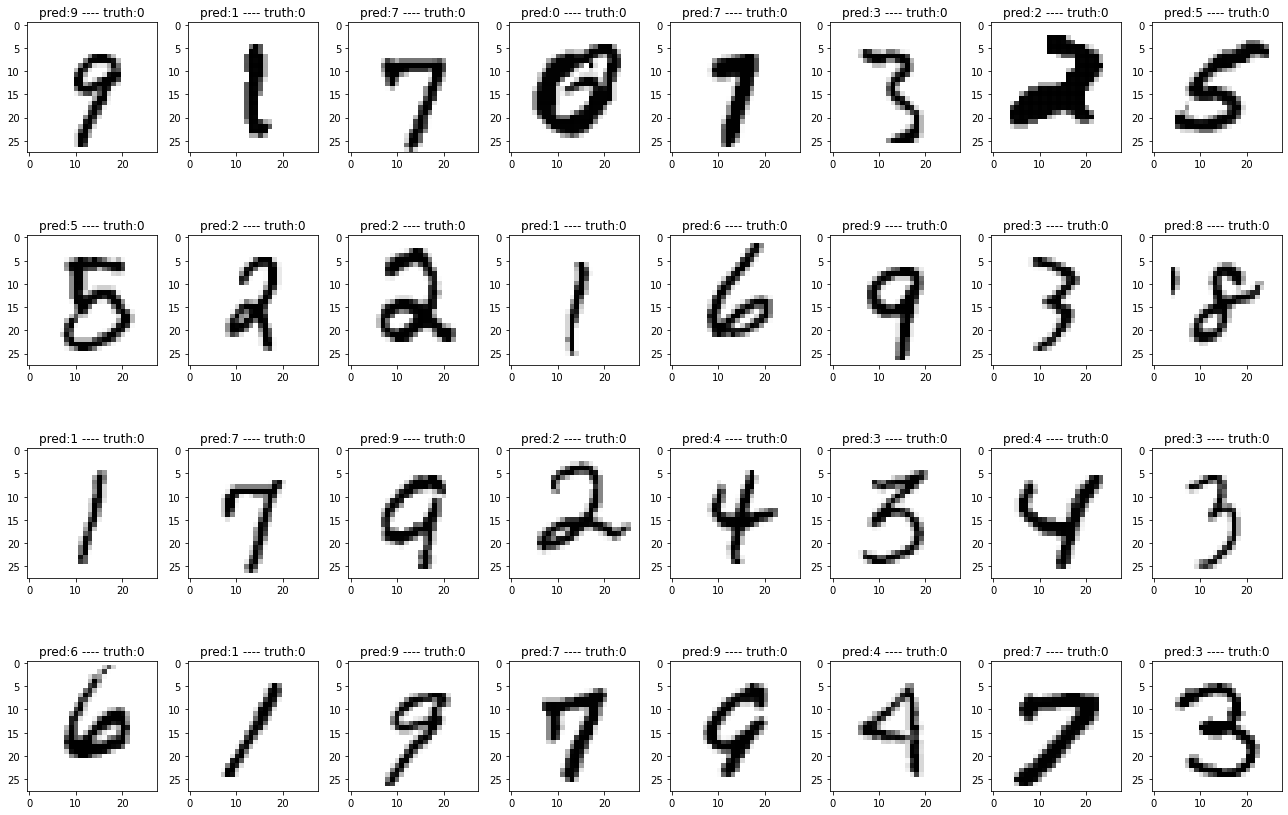

# **Train Test Split in the training data only!!**

In [220]:
print(y_train.shape)

(42000, 10)


In [221]:

from sklearn.model_selection import train_test_split

X_tr, X_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.2)

In [222]:
X_tr = X_tr.reshape(X_tr.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)

In [223]:
new_model = CNN_classification()

In [224]:
print(X_tr.shape)
print(y_tr.shape)

(33600, 28, 28, 1)
(33600, 10)


In [225]:
# define early stopping
earlystop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# fit the model and save the information in history
history = new_model.fit(
    X_tr,
    y_tr,
    batch_size = 64,
    epochs = 3,
    validation_data = (X_val, y_val),
    callbacks = [earlystop])

Epoch 1/3
525/525 [==============================] - 11s 21ms/step - loss: 0.4784 - accuracy: 0.8437 - val_loss: 0.1344 - val_accuracy: 0.9583
Epoch 2/3
525/525 [==============================] - 11s 20ms/step - loss: 0.1564 - accuracy: 0.9495 - val_loss: 0.0777 - val_accuracy: 0.9758
Epoch 3/3
525/525 [==============================] - 11s 20ms/step - loss: 0.1130 - accuracy: 0.9637 - val_loss: 0.0596 - val_accuracy: 0.9814


In [228]:
print(X_val.shape)
print(y_val.shape)

(8400, 28, 28, 1)
(8400, 10)


In [230]:
results = new_model.evaluate(X_val, y_val, batch_size=64)
print(f"valid loss: {results[0]}, valid acc: {round(results[1]*100,2)}%")

132/132 [==============================] - 1s 7ms/step - loss: 0.0596 - accuracy: 0.9814
valid loss: 0.05960947275161743, valid acc: 98.14%


In [231]:
# get probabilities
probabilities = new_model.predict(X_val)

# get the prediction class
y_pred = np.argmax(probabilities, axis=1)

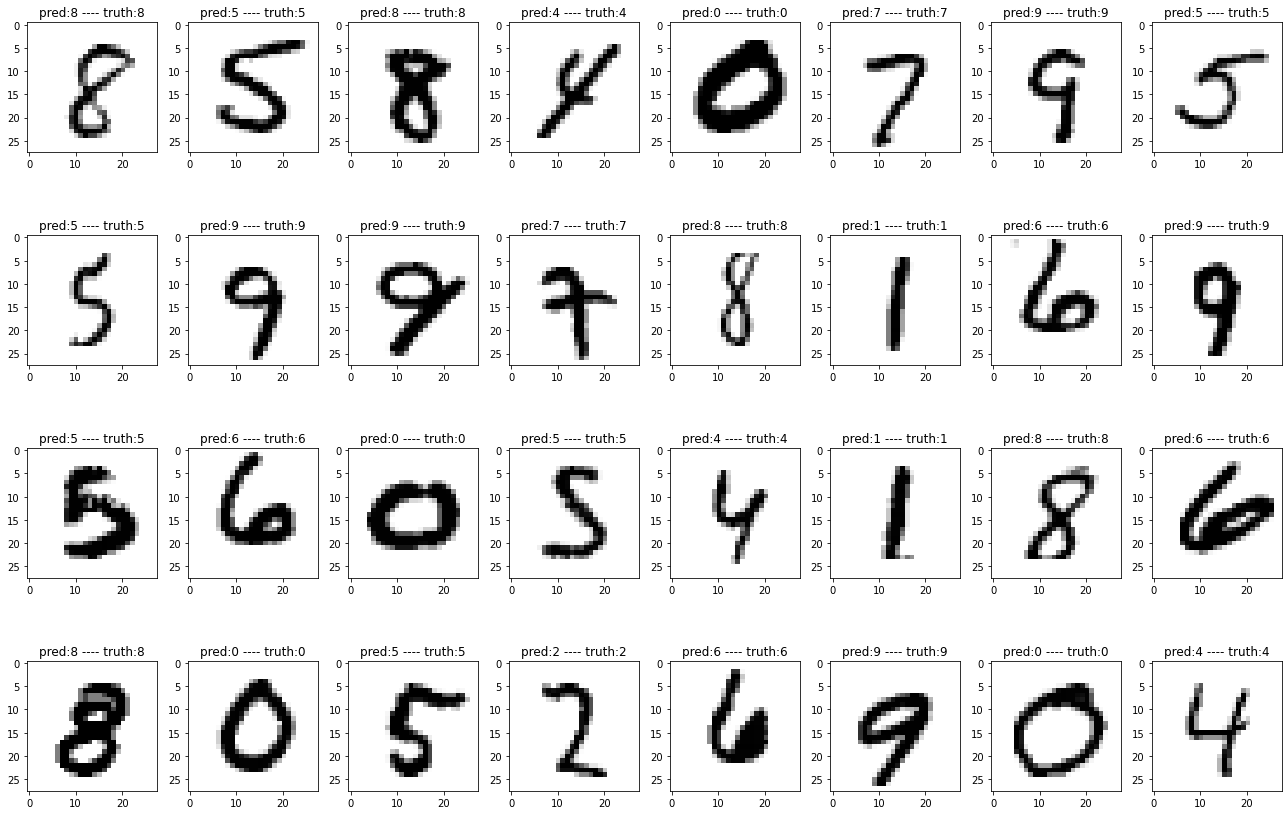

In [232]:
# pick random data
idx = np.random.randint(0, X_val.shape[0], 32)

fig, ax = plt.subplots(4, 8, figsize=(18,12))
k = 0
for i in range(4):
    for j in range(8):
        x = X_val[idx[k]]
        y = np.argmax(y_val[idx[k]])
        ypred = y_pred[idx[k]]
        ax[i,j].imshow(x.reshape(28,28), cmap = plt.cm.binary)
        ax[i,j].set_title(f'pred:{ypred} ---- truth:{y}')
        k += 1    
plt.tight_layout()